<a href="https://colab.research.google.com/github/ALRIER/DtaScienceAssignments_WaterlooUniversity/blob/Assignments/Intro2DataScienceI/Intro2DataSC_ASSIG3_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [ ]:
NAME = "Alvaro Rivera"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [ ]:
# all imports and env variables
#import pandas as pd
#pd.core.common.is_list_like = pd.api.types.is_list_like
#import datetime
#import pandas_datareader.data as web

# This line of code should work on Windows and Mac
#%env QUANDL_API_KEY = 'u661DanykzSkE7y5ghEs'

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
#import quandl
#quandl.ApiConfig.api_key = "u661DanykzSkE7y5ghEs"

In [ ]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

#start = datetime.datetime(2015, 11, 12)
#end = datetime.datetime(2020, 11, 12)

#amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end)

### Option 2 - Using Yahoo Finance `yfinance` library

In [ ]:
#import yfinance as yf
#from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
#yf.pdr_override()

#amzn = pdr.get_data_yahoo('AMZN', start = start)


In [ ]:
# 2) Using fix_yahoo_finance library only to download AMZN data

#amzn = yf.download('AMZN', start=start)

In [ ]:
# If we want to download multipe stocks into a single dataframe:

#all_stocks_list = ['AMZN', 'FB']
#all_stocks = yf.download(all_stocks_list, start = start)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
import pandas_profiling
from scipy.stats import chi2_contingency
from matplotlib import style
from scipy import stats
from pandas_profiling import ProfileReport
from google.colab import drive
from datetime import datetime
from datetime import timedelta
plt.style.use('ggplot')
%matplotlib inline
warnings.filterwarnings('ignore')   
drive.mount('/content/drive')

Mounted at /content/drive


# Sección nueva

<h2>Download the adjusted close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use .csv files provided. This will not affect your grade for the assignment.</h2>

I used each data frame you gave us becouse, when I tried to download the data, got lots of errors.  

In [ ]:
AMZN=pd.read_csv('/content/drive/MyDrive/Waterloo Datascience. /assignment 3/amzn_2012-7-31_2017-6-30.csv', index_col='Date', parse_dates=['Date'])
AMZN.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-30,980.12,983.47,967.61,968.00,3309138.0,0.0,1.0,980.12,983.47,967.61,968.00,3309138.0
2017-06-29,979.00,987.56,965.25,975.93,4246765.0,0.0,1.0,979.00,987.56,965.25,975.93,4246765.0
2017-06-28,978.55,990.68,969.21,990.33,3708638.0,0.0,1.0,978.55,990.68,969.21,990.33,3708638.0
2017-06-27,990.69,998.80,976.00,976.78,3735360.0,0.0,1.0,990.69,998.80,976.00,976.78,3735360.0
2017-06-26,1008.50,1009.80,992.00,993.98,3347195.0,0.0,1.0,1008.50,1009.80,992.00,993.98,3347195.0


In [ ]:
IBM=pd.read_csv('/content/drive/MyDrive/Waterloo Datascience. /assignment 3/ibm_2012-7-31_2017-6-30.csv', index_col='Date', parse_dates=['Date'])
IBM.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-30,154.28,154.50,153.14,153.83,3501395.0,0.0,1.0,151.159970,151.375521,150.043024,150.719070,3501395.0
2017-06-29,155.35,155.74,153.62,154.13,3245649.0,0.0,1.0,152.208331,152.590444,150.513317,151.013003,3245649.0
2017-06-28,155.15,155.55,154.78,155.32,2203062.0,0.0,1.0,152.012376,152.404286,151.649858,152.178938,2203062.0
2017-06-27,155.00,155.34,154.50,154.75,2385619.0,0.0,1.0,151.865409,152.198533,151.375521,151.620465,2385619.0
2017-06-26,154.71,155.75,154.63,155.23,2129945.0,0.0,1.0,151.581274,152.600242,151.502892,152.090758,2129945.0


In [ ]:
FB=pd.read_csv('/content/drive/MyDrive/Waterloo Datascience. /assignment 3/fb_2012-7-31_2017-6-30.csv', index_col='Date', parse_dates=['Date'])
FB.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-30,151.90,151.92,150.0600,150.98,14540013.0,0.0,1.0,151.90,151.92,150.0600,150.98,14540013.0
2017-06-29,152.28,152.50,148.9175,151.04,23771610.0,0.0,1.0,152.28,152.50,148.9175,151.04,23771610.0
2017-06-28,150.92,153.47,149.8600,153.24,16621566.0,0.0,1.0,150.92,153.47,149.8600,153.24,16621566.0
2017-06-27,152.84,153.31,150.3900,150.58,19274022.0,0.0,1.0,152.84,153.31,150.3900,150.58,19274022.0
2017-06-26,156.25,156.50,153.1954,153.59,17934289.0,0.0,1.0,156.25,156.50,153.1954,153.59,17934289.0


In [ ]:
MMM=pd.read_csv('/content/drive/MyDrive/Waterloo Datascience. /assignment 3/mmm_2012-7-31_2017-6-30.csv', index_col='Date', parse_dates=['Date'])
MMM.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-30,209.91,209.910,207.85,208.19,1749132.0,0.0,1.0,208.700040,208.700040,206.651914,206.989955,1749132.0
2017-06-29,211.05,211.050,207.08,207.85,1792372.0,0.0,1.0,209.833469,209.833469,205.886353,206.651914,1792372.0
2017-06-28,210.78,211.175,210.09,210.62,1532866.0,0.0,1.0,209.565025,209.957749,208.879003,209.405948,1532866.0
2017-06-27,212.00,212.500,209.38,209.78,2226566.0,0.0,1.0,210.777993,211.275111,208.173095,208.570790,2226566.0
2017-06-26,212.79,213.470,212.31,212.61,1319058.0,0.0,1.0,211.563439,212.239520,211.086206,211.384477,1319058.0


<h2>Resample the data to get prices for the end of the business month. Select the Adjusted Close for each stock.</h2>

In [ ]:
#Here i will resample the data for each business month period.
RsampAMZN=AMZN['AdjClose'].resample('BM').last()
RsampAMZN=pd.DataFrame(RsampAMZN) 
RsampAMZN.head()

,AdjClose
Date,
2012-07-31,233.3000
2012-08-31,248.2700
2012-09-28,254.3200
2012-10-31,232.8931
2012-11-30,252.0500


In [ ]:
#After each procedure i want to check if there is or not nan o null values.
RsampAMZN.isnull().sum()

AdjClose    0
dtype: int64

In [ ]:
RsampFB=FB['AdjClose'].resample('BM').last()
RsampFB=pd.DataFrame(RsampFB)
RsampFB.head()

,AdjClose
Date,
2012-07-31,21.710
2012-08-31,18.058
2012-09-28,21.660
2012-10-31,21.110
2012-11-30,28.000


In [ ]:
RsampFB.isnull().sum()

AdjClose    0
dtype: int64

In [ ]:
RsampIBM=IBM['AdjClose'].resample('BM').last()
RsampIBM=pd.DataFrame(RsampIBM)
RsampIBM.head()

,AdjClose
Date,
2012-07-31,167.112403
2012-08-31,166.858424
2012-09-28,177.648345
2012-10-31,166.584394
2012-11-30,163.488846


In [ ]:
RsampIBM.isnull().sum()

AdjClose    0
dtype: int64

In [ ]:
RsampMMM=MMM['AdjClose'].resample('BM').last()
RsampMMM=pd.DataFrame(RsampMMM)
RsampMMM.head()

,AdjClose
Date,
2012-07-31,80.117221
2012-08-31,81.838026
2012-09-28,81.678945
2012-10-31,77.419126
2012-11-30,80.912524


In [ ]:
RsampMMM.isnull().sum()

AdjClose    0
dtype: int64

<h2>Use the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.</h2>

<h2>Are they autocorrelated?
Provide short explanation.</h2>

In [ ]:
sns.set()

Text(0.5, 1.0, 'FB')

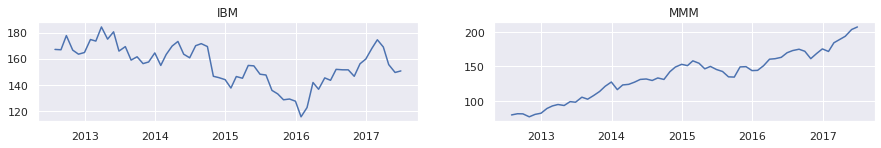

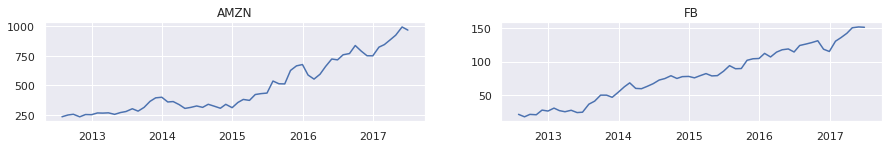

In [ ]:
#Plotting my figures
plt.figure(figsize=(15,4))
plt.subplot(221)
plt.plot(RsampIBM)
plt.title("IBM")

plt.subplot(222)
plt.plot(RsampMMM)
plt.title("MMM")

plt.figure(figsize=(15,4))
plt.subplot(223)
plt.plot(RsampAMZN)
plt.title("AMZN")

plt.subplot(224)
plt.plot(RsampFB)
plt.title("FB")

Text(0.5, 1.0, 'MMM Autocorrelation')

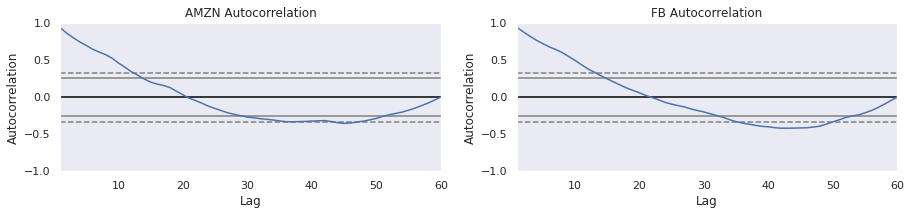

<Figure size 1080x432 with 0 Axes>

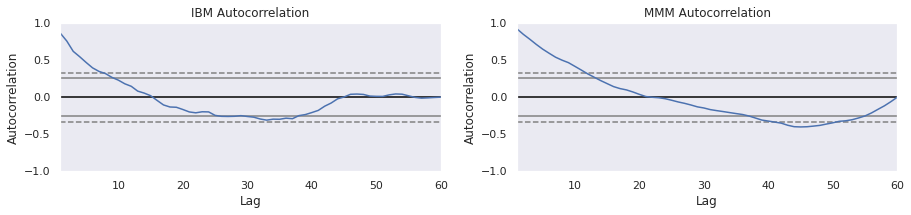

In [ ]:
#Plotting my autocorrelation plots. 
from pandas.plotting import autocorrelation_plot
ax=plt.figure(figsize=(15,6))
plt.subplot(221)
autocorrelation_plot(RsampAMZN)
plt.title("AMZN Autocorrelation")

plt.subplot(222)
autocorrelation_plot(RsampFB)
plt.title("FB Autocorrelation")

ax=plt.figure(figsize=(15,6))
plt.figure(figsize=(15,6))
plt.subplot(223)
autocorrelation_plot(RsampIBM)
plt.title("IBM Autocorrelation")

plt.subplot(224)
autocorrelation_plot(RsampMMM)
plt.title("MMM Autocorrelation")

I see AMZN, MMM, and FB are stocked with autocorrelations. In Lag 20 to 50, it is possible to see a little negative autocorrelation trend.

With IBM happens somewhat similarly, but at the lag number 40 the trend gets corrected and the line goes to 0, which means null autocorrelation.


In [ ]:
#Merge dataframes and rename
NewStock=pd.merge(RsampAMZN,RsampFB, on='Date',how='inner')
NewStock=NewStock.rename(columns={'AdjClose_x':'RsampAMZN',
                                  'AdjClose_y':'RsampFB'},inplace=False)
NewStock=pd.merge(NewStock,RsampIBM, on='Date',how='inner')
NewStock=NewStock.rename(columns={'AdjClose':'RsampIBM'},inplace=False)
NewStock=pd.merge(NewStock,RsampMMM, on='Date',how='inner')
NewStock=NewStock.rename(columns={'AdjClose':'RsampMM'},inplace=False)
NewStock=pd.DataFrame(NewStock)
NewStock.head()


,RsampAMZN,RsampFB,RsampIBM,RsampMM
Date,,,,
2012-07-31,233.3000,21.710,167.112403,80.117221
2012-08-31,248.2700,18.058,166.858424,81.838026
2012-09-28,254.3200,21.660,177.648345,81.678945
2012-10-31,232.8931,21.110,166.584394,77.419126
2012-11-30,252.0500,28.000,163.488846,80.912524


In [ ]:
NewStock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2012-07-31 to 2017-06-30
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RsampAMZN  60 non-null     float64
 1   RsampFB    60 non-null     float64
 2   RsampIBM   60 non-null     float64
 3   RsampMM    60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


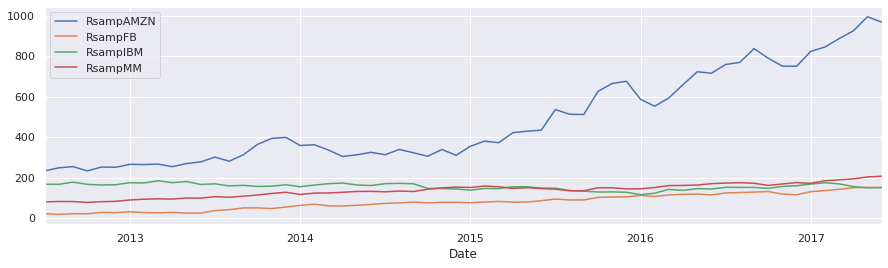

In [ ]:
NewStock.plot(figsize=(15,4))

<h2>Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using shift() function.</h2>

<h2>Use pandas autotocorrelation_plot() to plot the autocorrelation of the monthly returns.
Are the returns autocorrelated? Provide short explanation.</h2>




In [ ]:
#Now Im using Shift to create the lag 1 and make the difference between observations. 
RsampIBM1= RsampIBM['AdjClose'].shift(1)
RsampIBM1=pd.DataFrame(RsampIBM1)
newIBM = RsampIBM.subtract(RsampIBM1)
newIBM.head()

,AdjClose
Date,
2012-07-31,NaN
2012-08-31,-0.253978
2012-09-28,10.789921
2012-10-31,-11.063951
2012-11-30,-3.095549


In [ ]:
RsampMMM1= RsampMMM['AdjClose'].shift(1)
RsampMMM1=pd.DataFrame(RsampMMM1)
newMMM = RsampMMM.subtract(RsampMMM1)
newMMM.head()

,AdjClose
Date,
2012-07-31,NaN
2012-08-31,1.720804
2012-09-28,-0.159080
2012-10-31,-4.259819
2012-11-30,3.493398


In [ ]:
RsampFB1= RsampFB['AdjClose'].shift(1)
RsampFB1=pd.DataFrame(RsampFB1)
newFB = RsampFB.subtract(RsampFB1)
newFB.head()


,AdjClose
Date,
2012-07-31,NaN
2012-08-31,-3.652
2012-09-28,3.602
2012-10-31,-0.550
2012-11-30,6.890


In [ ]:
RsampAMZN1= RsampAMZN['AdjClose'].shift(1)
RsampAMZN1=pd.DataFrame(RsampAMZN1)
newAMZN = RsampAMZN.subtract(RsampAMZN1)
newAMZN=pd.DataFrame(newAMZN)
newAMZN.head()

,AdjClose
Date,
2012-07-31,NaN
2012-08-31,14.9700
2012-09-28,6.0500
2012-10-31,-21.4269
2012-11-30,19.1569


Text(0.5, 1.0, 'newFB')

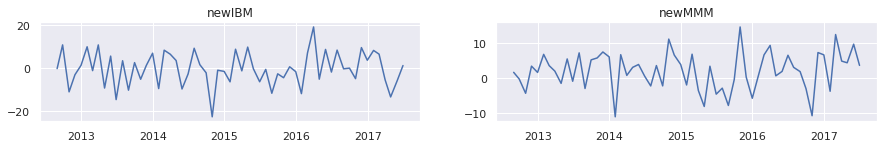

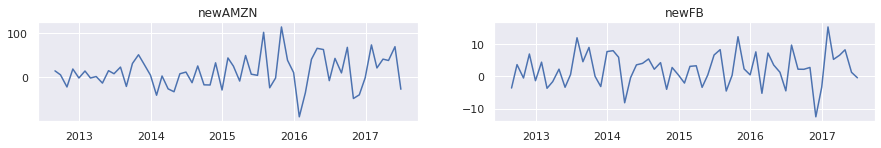

In [ ]:
#the graphic for each return in each stock
plt.figure(figsize=(15,4))
plt.subplot(221)
plt.plot(newIBM)
plt.title("newIBM")

plt.subplot(222)
plt.plot(newMMM)
plt.title("newMMM")

plt.figure(figsize=(15,4))
plt.subplot(223)
plt.plot(newAMZN)
plt.title("newAMZN")

plt.subplot(224)
plt.plot(newFB)
plt.title("newFB")

In [ ]:
#Now i will check the autocorrelation index to see statistically how it behaves. 
newAMZN['AdjClose'].autocorr()


0.056284856269385224

In [ ]:
newFB['AdjClose'].autocorr()

-0.05102342356620797

In [ ]:
newMMM['AdjClose'].autocorr(lag=1)

-0.029767058709234115

In [ ]:
newIBM['AdjClose'].autocorr(lag=1)

-0.1197754511002441

In the autocorr indexes, I can see that AMZN is the only one with a positive autocorrelation and the rest have negative autocorrelations, however, all the autocorrelation are pretty close to 0, which means that they don't have autocorrelation, especially because almost all of them are stationary now.

Text(0.5, 1.0, 'newMMM Autocorrelation')

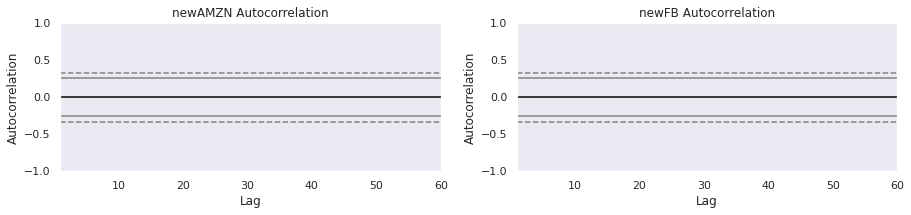

<Figure size 1080x432 with 0 Axes>

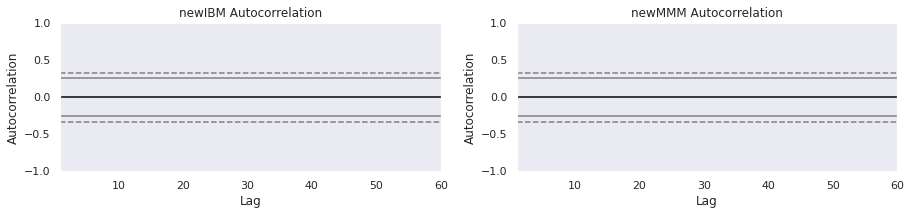

In [ ]:
#Autocorrelation plots for each return in each stock. 
ax=plt.figure(figsize=(15,6))
plt.subplot(221)
autocorrelation_plot(newAMZN)
plt.title("newAMZN Autocorrelation")

plt.subplot(222)
autocorrelation_plot(newFB)
plt.title("newFB Autocorrelation")

ax=plt.figure(figsize=(15,6))
plt.figure(figsize=(15,6))
plt.subplot(223)
autocorrelation_plot(newIBM)
plt.title("newIBM Autocorrelation")

plt.subplot(224)
autocorrelation_plot(newMMM)
plt.title("newMMM Autocorrelation")

<h2>Combine all 4 time series (returns) into a single DataFrame, Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use scatter_matrix() function from pandas.plotting).
Explain the results. Is there any correlation?</h2>

In [ ]:
#Merge dataframes and rename the columns. 
NewStock2=pd.merge(newIBM,newMMM, on='Date',how='inner')
NewStock2=NewStock2.rename(columns={'AdjClose_x':'newIBM',
                                  'AdjClose_y':'newMMM'},inplace=False)
NewStock2=pd.merge(NewStock2,newFB, on='Date',how='inner')
NewStock2=NewStock2.rename(columns={'AdjClose':'newFB'},inplace=False)
NewStock2=pd.merge(NewStock2,newAMZN, on='Date',how='inner')
NewStock2=NewStock2.rename(columns={'AdjClose':'newAMZN'},inplace=False)
NewStock2=pd.DataFrame(NewStock2)
NewStock2.head()

,newIBM,newMMM,newFB,newAMZN
Date,,,,
2012-07-31,NaN,NaN,NaN,NaN
2012-08-31,-0.253978,1.720804,-3.652,14.9700
2012-09-28,10.789921,-0.159080,3.602,6.0500
2012-10-31,-11.063951,-4.259819,-0.550,-21.4269
2012-11-30,-3.095549,3.493398,6.890,19.1569


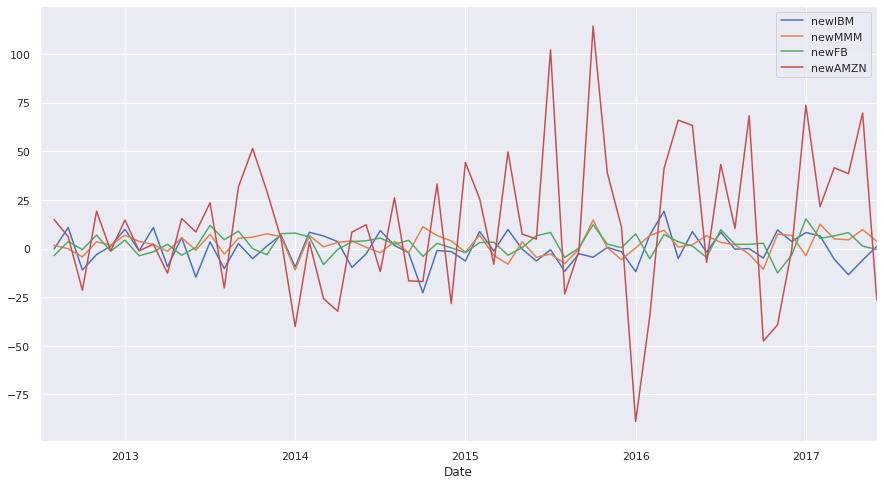

In [ ]:
NewStock2.plot(figsize=(15,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d27095ed0>,
      dtype=object)

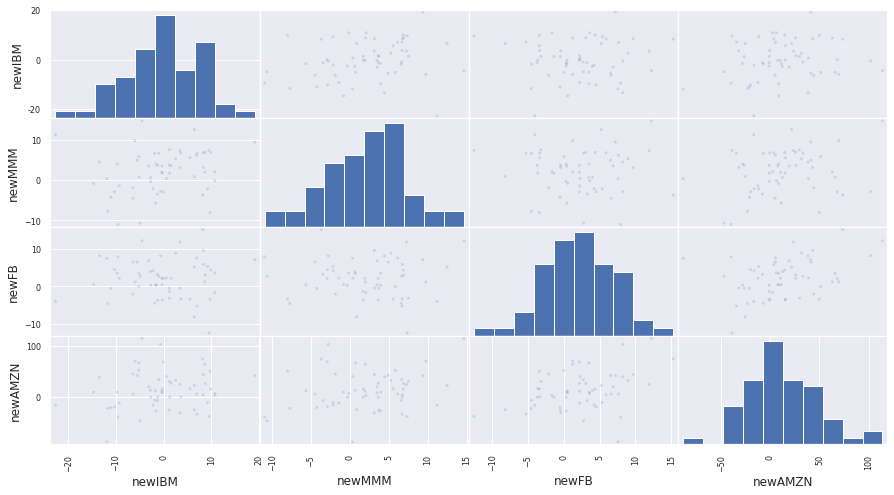

In [ ]:
pd.plotting.scatter_matrix(NewStock2, alpha=0.2,figsize=(15,8), diagonal='hist')